In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv")

In [24]:
#Mostrar colunas existentes no DF original
df.columns

Index(['Carimbo de data/hora', 'Qual seu curso atual/formação?',
       'Qual semestre você esta?',
       'Quais os principais motivos para escolher seu curso?',
       'Você sente que atendeu suas expectativas iniciais?',
       'Você pesquisou sobre o curso antes de fazer sua escolha?',
       'Você sentiu alguma incerteza ao escolher o curso?',
       'Quais foram os principais fatores de incerteza? (Marque todos os que se aplicam)',
       'Você se arrepende de ter escolhido seu curso?',
       'Se sim, quais são os principais motivos do arrependimento? (Marque todos os que se aplicam)  ',
       'Você já considerou mudar de curso?',
       'Se sim, quais são os principais fatores que influenciam sua decisão de permanecer ou mudar de curso? (Marque todos os que se aplicam)  '],
      dtype='object')

In [36]:
# Renomeando as colunas
df_nomes_corretos = df.rename( columns={
    "Carimbo de data/hora" : "data_hora",
    "Qual seu curso atual/formação?" : "curso",
    "Qual semestre você esta?" : "semestre_atual",
    "Quais os principais motivos para escolher seu curso?" : "motivo_que_escolhi_curso",
    "Você sente que atendeu suas expectativas iniciais?" : "atendeu_expectativas",
    "Você pesquisou sobre o curso antes de fazer sua escolha?" : "pesquisou_antes_de_escolher",
    "Você sentiu alguma incerteza ao escolher o curso?" : "incerteza_escolher_curso",
    "Quais foram os principais fatores de incerteza? (Marque todos os que se aplicam)" : "fatores_incerteza",
    "Você se arrepende de ter escolhido seu curso?" : "se_arrepende",
    "Se sim, quais são os principais motivos do arrependimento? (Marque todos os que se aplicam)  " : "motivos_arrependimento",
    "Você já considerou mudar de curso?" : "trocar_curso",
    "Se sim, quais são os principais fatores que influenciam sua decisão de permanecer ou mudar de curso? (Marque todos os que se aplicam)  " : "motivos_trocar_curso"
})

#Alterando nome dos cursos
df_nomes_corretos["curso"] = df_nomes_corretos["curso"].replace({
    "Ciências Humanas (História, Geografia, Psicologia, etc.)" : "Ciências Humanas",
    "Tecnologia (Computação, Engenharia, etc.)" : "Tecnologia",
    "Ciências Sociais Aplicadas (Administração, Direito, Economia, etc.)" : "Ciências Sociais Aplicadas",
    "Artes e Comunicação (Design, Jornalismo, Publicidade, etc.)" : "Artes e Comunicação",
    "Ciências Exatas (Matemática, Física, Química, etc.)" : "Ciências Exatas",
    "Ciências Biológicas (Biologia, Medicina, Enfermagem, etc.)" : "Ciências Biológicas"
})

# Deixando todos os números da coluna como string para evitar incoerências
df_nomes_corretos["atendeu_expectativas"] = df_nomes_corretos["atendeu_expectativas"].astype(str).str.strip()
df_nomes_corretos["pesquisou_antes_de_escolher"] = df_nomes_corretos["pesquisou_antes_de_escolher"].astype(str).str.strip()
df_nomes_corretos["incerteza_escolher_curso"] = df_nomes_corretos["incerteza_escolher_curso"].astype(str).str.strip()
df_nomes_corretos["se_arrepende"] = df_nomes_corretos["se_arrepende"].astype(str).str.strip()
df_nomes_corretos["trocar_curso"] = df_nomes_corretos["trocar_curso"].astype(str).str.strip()

In [37]:
df_nomes_corretos["curso"].unique()

array(['Ciências Humanas', 'Tecnologia', 'Ciências Biológicas', 'Outros',
       'Ciências Sociais Aplicadas', 'Artes e Comunicação',
       'Ciências Exatas'], dtype=object)

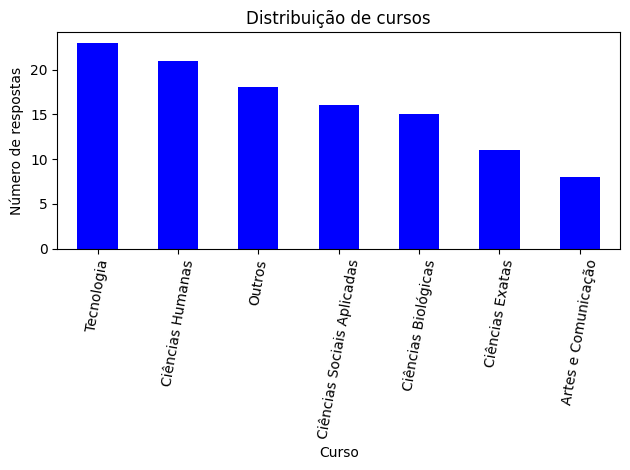

In [68]:
df_nomes_corretos["curso"].value_counts().plot(kind='bar', color='blue')
plt.title("Distribuição de cursos")
plt.xlabel("Curso")
plt.ylabel("Número de respostas")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()


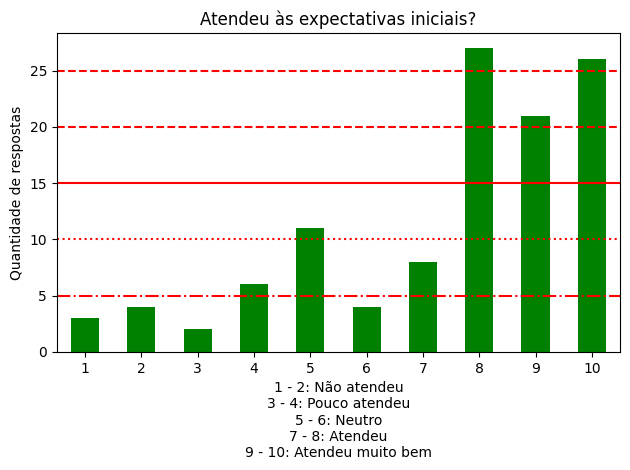

In [84]:
df_nomes_corretos["atendeu_expectativas"] = pd.to_numeric(df_nomes_corretos["atendeu_expectativas"], errors='coerce')

df_nomes_corretos["atendeu_expectativas"].value_counts().sort_index().plot(kind='bar', color='green')
plt.title("Atendeu às expectativas iniciais?")
plt.xlabel("""1 - 2: Não atendeu\n3 - 4: Pouco atendeu\n5 - 6: Neutro\n7 - 8: Atendeu\n9 - 10: Atendeu muito bem""")
plt.ylabel("Quantidade de respostas")
plt.xticks(rotation=0)
plt.axhline(y=5, color='red', linestyle='-.')
plt.axhline(y=10, color='red', linestyle='dotted')
plt.axhline(y=15, color='red', linestyle='-')
plt.axhline(y=20, color='red', linestyle='--')
plt.axhline(y=25, color='red', linestyle='--')
plt.tight_layout()
plt.show()